In [45]:
library("ropls")
library("RGCCA")

In [46]:
RNA.m<-read.csv("seqdata_vstnorm.csv",row.names = 1)
Low.m<-cbind(RNA.m[,1],sapply(1:5,function(i) RNA.m[,1]+0.05*rnbinom(nrow(RNA.m), mu = mean(RNA.m[,1]), size = 5400)))
High.m<-cbind(RNA.m[,4],sapply(1:5,function(i) RNA.m[,4]+0.05*rnbinom(nrow(RNA.m), mu = mean(RNA.m[,4]), size = 5400)))
total_RNA.m<-t(cbind(Low.m,High.m))
colnames(total_RNA.m)<-rownames(RNA.m)
nrow(total_RNA.m)

[1] 12

In [47]:
meta.m<-read.csv("wtHL_cpd_path_stats_data_mancur.csv",row.names = 1)
idx<-which(meta.m[,5]%in%c("NULL","empty"))
row.n<-paste(meta.m[-idx,5],meta.m[-idx,1],sep = "_")
kegg_meta.m<-meta.m[-idx,12:23]
idx<-which(duplicated(row.n))
kegg_meta.m<-kegg_meta.m[-idx,]
rownames(kegg_meta.m)<-row.n[-idx]
kegg_meta.m<-t(kegg_meta.m[,c(1,8:12,2:7)])

In [48]:
library("CCA")

In [13]:
res.rcc=rcc(total_RNA.m,kegg_meta.m,0.2,0.1)

In [50]:
block.coef=res.cc$xcoef

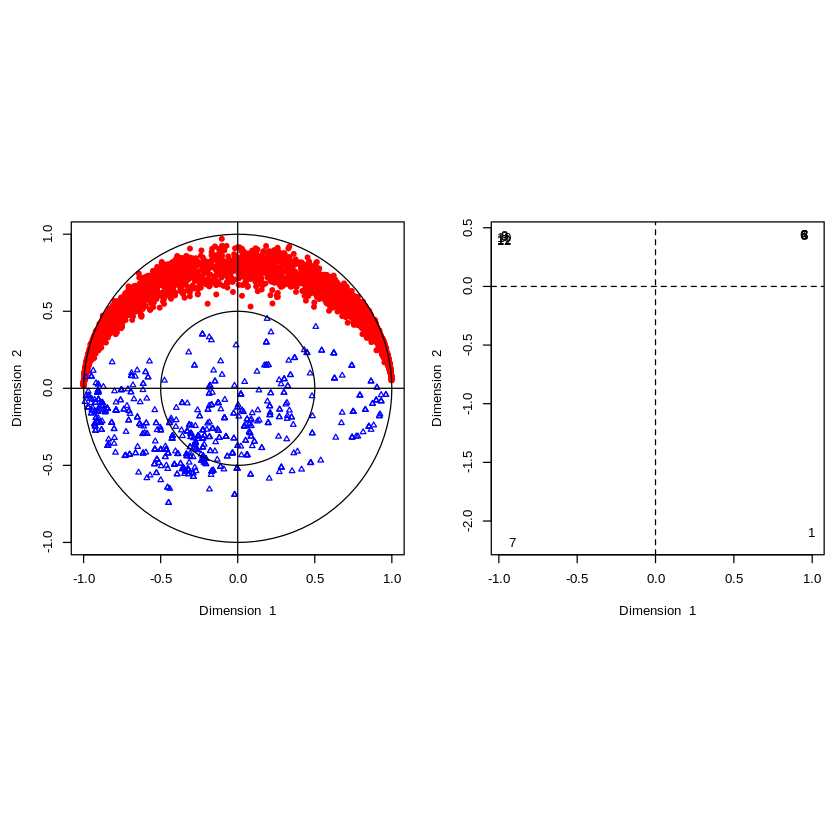

In [15]:
plt.cc(res.cc)

Computation of the RGCCA block components based on the centroid scheme 
Optimal Shrinkage intensity paramaters are estimated 
 Iter:    1  Fit: 1.43921902  Dif:  0.47564256 
 Iter:    2  Fit: 1.55815390  Dif:  0.11893488 
 Iter:    3  Fit: 1.56803057  Dif:  0.00987667 
 Iter:    4  Fit: 1.56882885  Dif:  0.00079828 
 Iter:    5  Fit: 1.56889342  Dif:  0.00006457 
 Iter:    6  Fit: 1.56889865  Dif:  0.00000522 
 Iter:    7  Fit: 1.56889907  Dif:  0.00000042 
 Iter:    8  Fit: 1.56889910  Dif:  0.00000003 
 Iter:    9  Fit: 1.56889911  Dif:  0.00000000 
The RGCCA algorithm converged to a stationary point after 8 iterations 


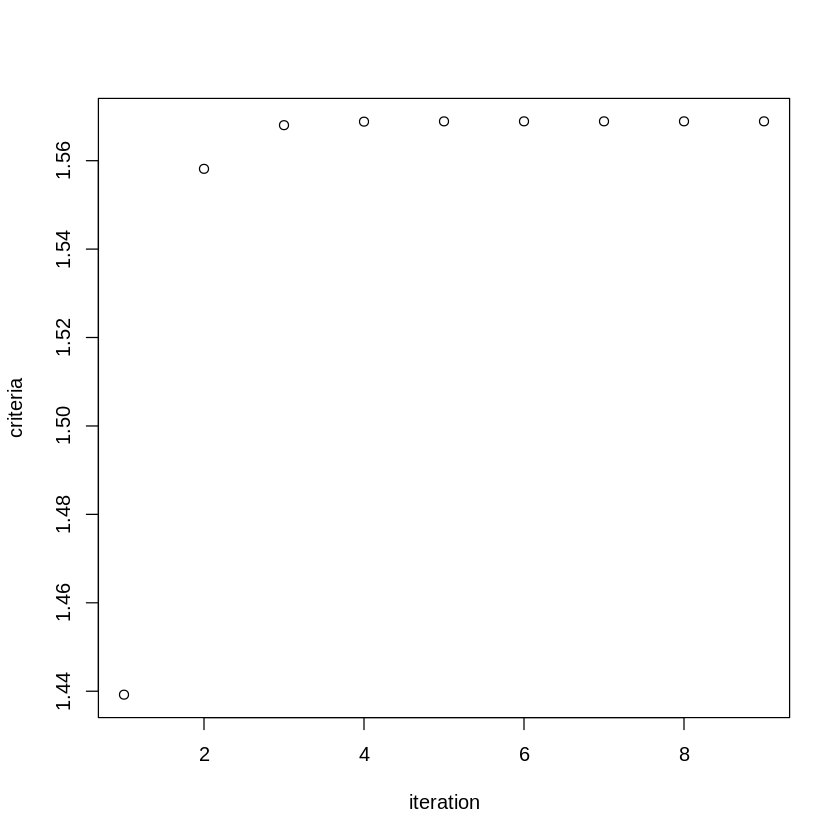

In [25]:
res.rcca=rgcca(A=list(total_RNA.m,kegg_meta.m),
     C=matrix(c(0,1,1,0),2,2),
     tau = c("0<tau1<1", "0<tau2<1"))

In [52]:
weight=res.rcca$a